# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('../datasets/mlb_pitch_stats_19_21_cleaned.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df.shape)
df.head()

(704, 88)


,last_name,first_name,player_id,year,age,ip,bf,ab,h,k%,...,cb_vb,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range
0,Wainwright,Adam,425794,2021,40,196.1,784,725,157,21.6,...,-66.4,22.3,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6
1,Greinke,Zack,425844,2021,38,164.2,670,626,157,17.0,...,-64.9,15.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Santana,Ervin,429722,2021,39,61.1,255,232,58,18.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Petit,Yusmeiro,433589,2021,37,72.1,290,273,63,12.4,...,-48.8,10.7,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3
4,Jansen,Kenley,445276,2021,34,61.2,250,210,33,29.6,...,NaN,NaN,NaN,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9


In [3]:
df2 = pd.read_csv('../datasets/mlb_pitch_stats_20_cleaned.csv')
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df2.shape)
df2.head()

(368, 88)


,last_name,first_name,player_id,year,age,ip,bf,ab,h,k%,...,cb_vb,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range
0,Wainwright,Adam,425794,2020,39,65.2,262,244,54,20.6,...,-65.5,22.0,1.6,22.9,85.0,2343.0,6.0,-31.3,8.9,1.5
1,Greinke,Zack,425844,2020,37,67.0,273,262,67,24.5,...,-66.6,15.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Petit,Yusmeiro,433589,2020,36,21.2,88,82,19,19.3,...,-50.4,13.3,1.4,28.6,84.4,2133.0,0.2,-22.7,15.6,1.2
3,Sanchez,Anibal,434671,2020,36,53.0,245,224,70,17.6,...,-48.6,4.7,1.6,21.0,87.3,2189.0,0.7,-23.4,12.5,2.2
4,Rondon,Hector,444468,2020,32,20.0,97,84,25,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pitch_data = pd.concat([df, df2])
print(pitch_data.shape)
pitch_data.head()

(1072, 88)


,last_name,first_name,player_id,year,age,ip,bf,ab,h,k%,...,cb_vb,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range
0,Wainwright,Adam,425794,2021,40,196.1,784,725,157,21.6,...,-66.4,22.3,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6
1,Greinke,Zack,425844,2021,38,164.2,670,626,157,17.0,...,-64.9,15.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Santana,Ervin,429722,2021,39,61.1,255,232,58,18.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Petit,Yusmeiro,433589,2021,37,72.1,290,273,63,12.4,...,-48.8,10.7,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3
4,Jansen,Kenley,445276,2021,34,61.2,250,210,33,29.6,...,NaN,NaN,NaN,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9


In [5]:
data = pitch_data.copy()

# Data Cleaning

### Nulls and dtypes

In [6]:
pitch_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 367
Data columns (total 88 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   last_name         1072 non-null   object 
 1    first_name       1072 non-null   object 
 2   player_id         1072 non-null   int64  
 3   year              1072 non-null   int64  
 4   age               1072 non-null   int64  
 5   ip                1072 non-null   float64
 6   bf                1072 non-null   int64  
 7   ab                1072 non-null   int64  
 8   h                 1072 non-null   int64  
 9   k%                1072 non-null   float64
 10  bb%               1072 non-null   float64
 11  ba                1072 non-null   float64
 12  slg%              1072 non-null   float64
 13  obp%              1072 non-null   float64
 14  ops               1072 non-null   float64
 15  earned_runs       1072 non-null   int64  
 16  era               1072 non-null   float64
 

### Fill Nulls with 999 (subject to change)

In [7]:
pitch_data.fillna(value = 0, inplace = True)
pitch_data[pitch_data.columns[pitch_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [8]:
pitch_data['xops'] = pitch_data['xobp'] + pitch_data['xslg']
data['xops'] = data['xobp'] + data['xslg']

### Split Features in DataFrame by Category

In [9]:
stats = pitch_data.iloc[:, :51].copy()
print('stats:', stats.shape)

pitch = pitch_data.iloc[:, 51:].copy()
print('pitch:', pitch.shape)


metrics = pitch_data.iloc[:, 4:26].copy()
print('metrics:', metrics.shape)

adv_metrics = pitch_data.iloc[:, 27:49].copy()
print('adv_metrics:', adv_metrics.shape)

velo = pitch_data[['4seam_velo', 'sl_velo', 
           'ch_velo', 'cb_velo', 
           'cu_velo', '4seam_velo_range', 
           'sl_velo_range', 'ch_velo_range', 
           'cb_velo_range', 'cu_velo_range']].copy()
print('velo:', velo.shape)
# 2seam_velo, 2seam_velo_range

spin = pitch_data[['4seam_spinrate', 'sl_spinrate', 
           'ch_spinrate', 'cb_spinrate', 
           'cu_spinrate', '4seam_hb', 
           '4seam_vb', 'sl_hb', 'sl_vb', 
           'ch_hb', 'ch_vb', 'cb_hb', 
           'cb_vb', 'cu_vb', 'cu_hb', ]].copy()

# '2seam_spinrate', '2seam_hb', '2seam_vb'

print('spin:', spin.shape)

stats: (1072, 51)
pitch: (1072, 38)
metrics: (1072, 22)
adv_metrics: (1072, 22)
velo: (1072, 10)
spin: (1072, 15)


In [10]:
pitch_data.head()

,last_name,first_name,player_id,year,age,ip,bf,ab,h,k%,...,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops
0,Wainwright,Adam,425794,2021,40,196.1,784,725,157,21.6,...,22.3,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6,0.681
1,Greinke,Zack,425844,2021,38,164.2,670,626,157,17.0,...,15.6,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725
2,Santana,Ervin,429722,2021,39,61.1,255,232,58,18.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851
3,Petit,Yusmeiro,433589,2021,37,72.1,290,273,63,12.4,...,10.7,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3,0.722
4,Jansen,Kenley,445276,2021,34,61.2,250,210,33,29.6,...,0.0,0.0,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9,0.570


In [11]:
velo.cu_velo.value_counts(ascending = True)

94.2      1
78.8      1
84.5      1
86.1      1
82.7      1
       ... 
85.4      8
86.6      8
87.2     10
87.5     11
0.0     721
Name: cu_velo, Length: 110, dtype: int64

In [39]:
#pitch_data.to_csv('../datasets/mlb_pitch_stats_19_20_21.csv')

# EDA

In [12]:
stats.describe()

,player_id,year,age,ip,bf,ab,h,k%,bb%,ba,...,pitch_count,z_contact%,in_zone%,edge%,whiff%,swing%,gb%,fb%,ld%,po%
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,585334.163246,2019.973881,29.013993,72.968284,310.095149,278.431903,67.880597,23.956343,8.674813,0.241052,...,1214.529851,80.913806,48.256716,42.445802,26.447015,47.231063,44.044123,23.144963,25.496082,7.315672
std,67180.681177,0.810337,3.651585,46.964846,195.680155,179.153855,45.802531,6.276428,2.995060,0.041441,...,758.612420,4.766129,3.482325,2.318879,5.518103,3.309581,8.568263,5.962893,4.532942,3.215883
min,282332.000000,2019.000000,21.000000,16.000000,75.000000,63.000000,8.000000,7.800000,2.000000,0.090000,...,272.000000,59.600000,36.300000,32.900000,13.400000,33.900000,13.600000,5.700000,12.500000,0.000000
25%,543243.000000,2019.000000,26.000000,43.175000,189.750000,166.000000,36.000000,19.600000,6.500000,0.213000,...,722.750000,78.100000,46.000000,41.000000,22.600000,45.100000,38.000000,19.100000,22.600000,5.100000
50%,605136.500000,2020.000000,29.000000,60.000000,254.500000,227.500000,54.000000,23.100000,8.300000,0.241000,...,997.500000,81.200000,48.300000,42.500000,26.000000,47.300000,43.950000,23.100000,25.100000,7.000000
75%,641816.000000,2021.000000,31.000000,90.400000,390.500000,352.000000,88.000000,27.700000,10.400000,0.269000,...,1544.750000,84.200000,50.800000,43.925000,29.700000,49.300000,49.700000,27.200000,27.900000,9.100000
max,685493.000000,2021.000000,42.000000,223.000000,911.000000,810.000000,227.000000,53.000000,21.300000,0.378000,...,3687.000000,96.600000,60.800000,51.400000,51.800000,59.200000,76.700000,41.300000,43.400000,23.500000


In [13]:
pitch.describe()

,n_pitches,4seam%,4seam_velo,4seam_spinrate,4seam_hb,4seam_vb,4seam_brk,4seam_velo_range,sl%,sl_velo,...,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,1207.961754,35.155410,89.592351,2180.055970,-3.173694,-15.608769,16.855410,1.281903,18.281157,62.941884,...,9.384235,1.117351,7.231063,28.930504,767.860075,0.409608,-8.891698,3.033489,0.485261,0.713809
std,751.832608,20.596602,18.487592,471.390965,7.382091,4.901611,4.161565,0.363083,15.859613,36.908771,...,7.295460,0.797169,14.027337,41.511393,1107.889228,1.869229,13.053618,4.653281,0.723248,0.097250
min,272.000000,0.000000,0.000000,0.000000,-16.800000,-54.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-14.400000,-49.800000,0.000000,0.000000,0.379000
25%,719.000000,18.775000,91.600000,2146.750000,-8.700000,-17.700000,16.000000,1.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.800000,0.000000,0.000000,0.646000
50%,994.000000,38.300000,93.400000,2264.000000,-5.600000,-15.600000,17.900000,1.300000,17.850000,83.400000,...,10.950000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.711000
75%,1544.750000,50.600000,94.800000,2373.500000,1.200000,-13.700000,19.100000,1.500000,28.825000,86.000000,...,15.700000,1.700000,9.350000,86.500000,2194.500000,0.000000,0.000000,7.225000,1.300000,0.777000
max,3686.000000,96.400000,100.600000,2783.000000,18.800000,0.000000,23.000000,2.500000,87.400000,92.500000,...,27.000000,4.300000,81.100000,100.200000,2928.000000,10.300000,0.000000,21.900000,3.300000,1.119000


In [14]:
metrics.describe()

,age,ip,bf,ab,h,k%,bb%,ba,slg%,obp%,...,era,qual_start,cg,xba,xslg,woba,xwoba,xobp,wobacon,xwobacon
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,29.013993,72.968284,310.095149,278.431903,67.880597,23.956343,8.674813,0.241052,0.408381,0.313243,...,4.242201,3.468284,0.109142,0.237684,0.401076,0.310672,0.311649,0.312733,0.368159,0.369471
std,3.651585,46.964846,195.680155,179.153855,45.802531,6.276428,2.995060,0.041441,0.085314,0.040858,...,1.529310,5.315351,0.386792,0.033731,0.070624,0.044850,0.038085,0.035740,0.055898,0.040240
min,21.000000,16.000000,75.000000,63.000000,8.000000,7.800000,2.000000,0.090000,0.157000,0.160000,...,0.330000,0.000000,0.000000,0.108000,0.181000,0.164000,0.182000,0.179000,0.180000,0.236000
25%,26.000000,43.175000,189.750000,166.000000,36.000000,19.600000,6.500000,0.213000,0.351000,0.286000,...,3.240000,0.000000,0.000000,0.216000,0.353000,0.280000,0.286000,0.289000,0.330750,0.342000
50%,29.000000,60.000000,254.500000,227.500000,54.000000,23.100000,8.300000,0.241000,0.406500,0.314000,...,4.065000,0.000000,0.000000,0.239000,0.399000,0.310000,0.311000,0.312000,0.368000,0.368000
75%,31.000000,90.400000,390.500000,352.000000,88.000000,27.700000,10.400000,0.269000,0.459250,0.341000,...,5.052500,5.000000,0.000000,0.261000,0.448000,0.339000,0.335250,0.337000,0.401000,0.396000
max,42.000000,223.000000,911.000000,810.000000,227.000000,53.000000,21.300000,0.378000,0.759000,0.453000,...,10.260000,26.000000,3.000000,0.339000,0.717000,0.470000,0.452000,0.444000,0.588000,0.523000


In [15]:
adv_metrics.describe()

,xbacon,ev_avg,la_avg,sweet_spot%,barrel%,solid_contact%,poor_weak%,hard_hit%,z_swing%,z_swing_miss%,...,oz_contact%,out_zone%,pitch_count,z_contact%,in_zone%,edge%,whiff%,swing%,gb%,fb%
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,0.323672,88.558209,12.596642,33.031250,7.394030,5.969030,4.240299,37.377985,67.403731,18.549907,...,55.774534,51.743284,1214.529851,80.913806,48.256716,42.445802,26.447015,47.231063,44.044123,23.144963
std,0.028985,1.749346,5.635236,4.723013,2.595856,2.104216,2.206221,5.416031,4.108387,4.837633,...,8.986669,3.482325,758.612420,4.766129,3.482325,2.318879,5.518103,3.309581,8.568263,5.962893
min,0.213000,81.700000,-9.300000,15.700000,0.000000,0.000000,0.000000,14.000000,50.600000,3.400000,...,25.500000,39.200000,272.000000,59.600000,36.300000,32.900000,13.400000,33.900000,13.600000,5.700000
25%,0.306000,87.400000,9.100000,30.300000,5.600000,4.600000,2.775000,33.800000,64.800000,15.200000,...,50.300000,49.200000,722.750000,78.100000,46.000000,41.000000,22.600000,45.100000,38.000000,19.100000
50%,0.325000,88.600000,12.600000,33.300000,7.200000,5.800000,4.000000,37.500000,67.600000,18.100000,...,56.500000,51.700000,997.500000,81.200000,48.300000,42.500000,26.000000,47.300000,43.950000,23.100000
75%,0.342000,89.725000,16.400000,36.000000,9.000000,7.200000,5.400000,40.625000,70.100000,21.400000,...,62.025000,54.000000,1544.750000,84.200000,50.800000,43.925000,29.700000,49.300000,49.700000,27.200000
max,0.417000,94.400000,33.400000,47.800000,20.000000,13.700000,15.000000,56.400000,81.000000,40.000000,...,80.000000,63.700000,3687.000000,96.600000,60.800000,51.400000,51.800000,59.200000,76.700000,41.300000


In [16]:
velo.describe()

,4seam_velo,sl_velo,ch_velo,cb_velo,cu_velo,4seam_velo_range,sl_velo_range,ch_velo_range,cb_velo_range,cu_velo_range
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,89.592351,62.941884,68.391884,54.897388,28.930504,1.281903,1.210634,1.155690,1.117351,0.485261
std,18.487592,36.908771,34.289608,36.261250,41.511393,0.363083,0.763193,0.647732,0.797169,0.723248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.600000,0.000000,80.200000,0.000000,0.000000,1.200000,0.000000,1.100000,0.000000,0.000000
50%,93.400000,83.400000,84.800000,77.000000,0.000000,1.300000,1.500000,1.400000,1.400000,0.000000
75%,94.800000,86.000000,87.100000,80.225000,86.500000,1.500000,1.700000,1.500000,1.700000,1.300000
max,100.600000,92.500000,93.400000,87.200000,100.200000,2.500000,3.600000,3.100000,4.300000,3.300000


In [17]:
spin.describe()

,4seam_spinrate,sl_spinrate,ch_spinrate,cb_spinrate,cu_spinrate,4seam_hb,4seam_vb,sl_hb,sl_vb,ch_hb,ch_vb,cb_hb,cb_vb,cu_vb,cu_hb
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,2180.055970,1798.548507,1420.745336,1730.012127,767.860075,-3.173694,-15.608769,2.139646,-27.686847,-4.455877,-24.196362,2.887500,-37.605784,-8.891698,0.409608
std,471.390965,1070.688736,746.033237,1165.820786,1107.889228,7.382091,4.901611,5.889821,16.899896,11.392782,12.915164,7.459504,25.503077,13.053618,1.869229
min,0.000000,0.000000,0.000000,0.000000,0.000000,-16.800000,-54.200000,-22.700000,-60.700000,-20.600000,-55.200000,-26.000000,-78.900000,-49.800000,-14.400000
25%,2146.750000,0.000000,1431.500000,0.000000,0.000000,-8.700000,-17.700000,0.000000,-39.325000,-14.025000,-32.200000,0.000000,-56.100000,-23.800000,0.000000
50%,2264.000000,2306.000000,1680.500000,2321.000000,0.000000,-5.600000,-15.600000,1.400000,-34.400000,-9.800000,-28.400000,0.550000,-49.800000,0.000000,0.000000
75%,2373.500000,2495.000000,1885.000000,2576.750000,2194.500000,1.200000,-13.700000,5.100000,0.000000,0.000000,-23.200000,9.000000,0.000000,0.000000,0.000000
max,2783.000000,3270.000000,2852.000000,3349.000000,2928.000000,18.800000,0.000000,22.800000,0.000000,20.400000,0.000000,22.000000,0.000000,0.000000,10.300000


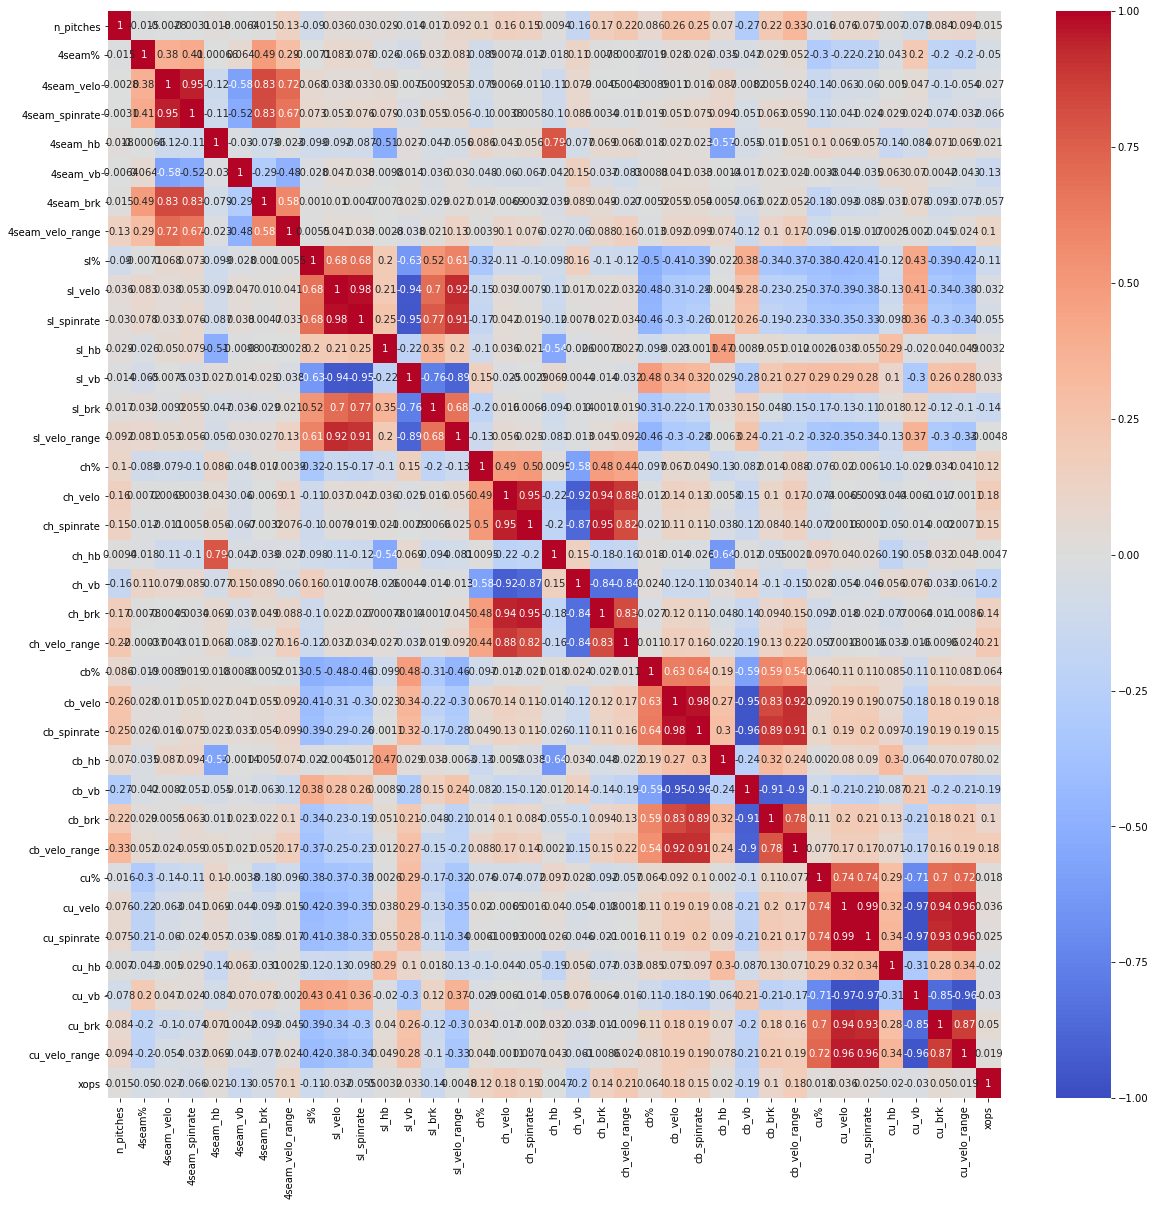

In [18]:
plt.figure(figsize = (20, 20))
sns.heatmap(pitch.corr(), annot = True, 
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm');
#plt.title('', 
#          fontsize = 14, fontweight = 'bold', pad = 12);

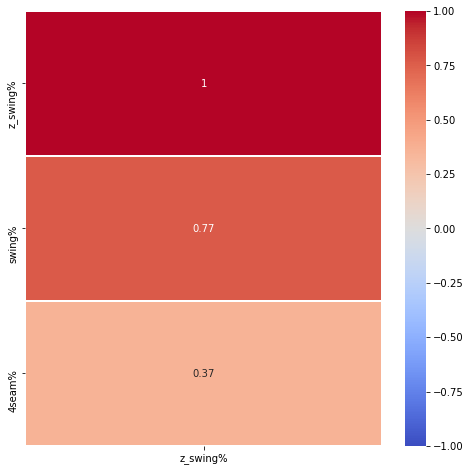

In [19]:
plt.figure(figsize = (8, 8))
sns.heatmap(pitch_data.corr()[['z_swing%']][pitch_data.corr()['z_swing%'] > .35].sort_values('z_swing%', 
                                                                            ascending = False),
            annot = True,
            linewidths = 1,
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm');

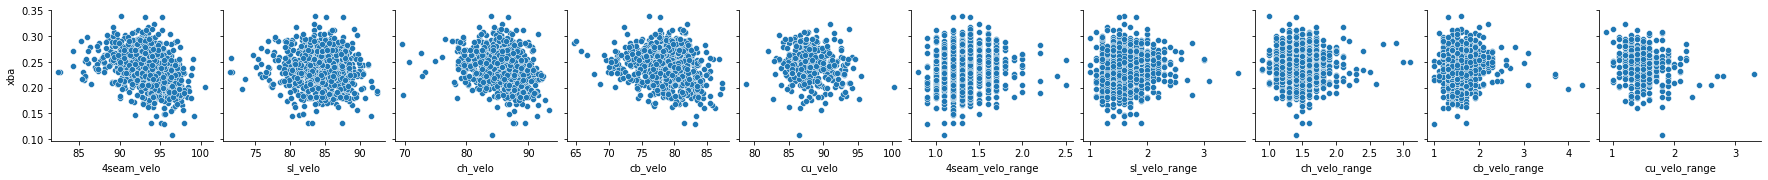

In [20]:
sns.pairplot(data = data, x_vars = velo, 
             y_vars = ['xba']);

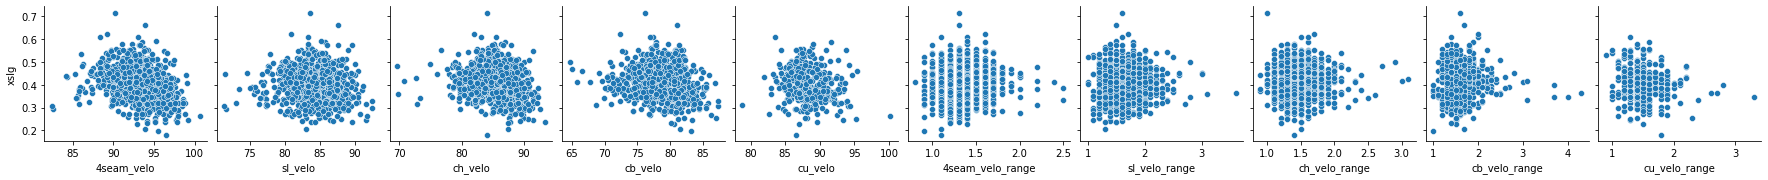

In [21]:
sns.pairplot(data = data, x_vars = velo, 
             y_vars = ['xslg']);

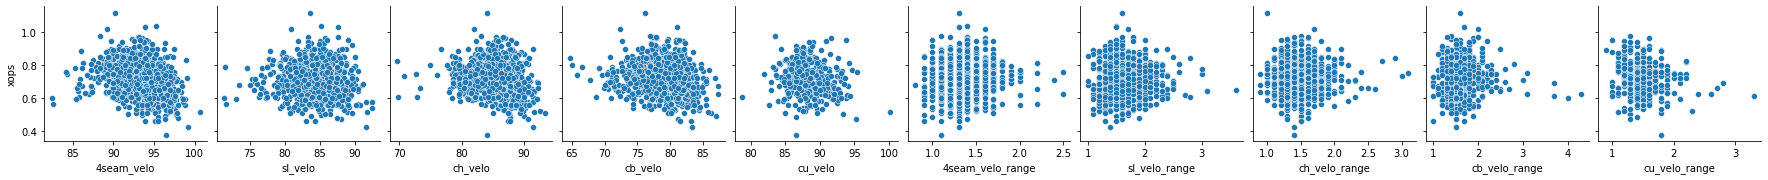

In [22]:
sns.pairplot(data = data, x_vars = velo, 
             y_vars = ['xops']);

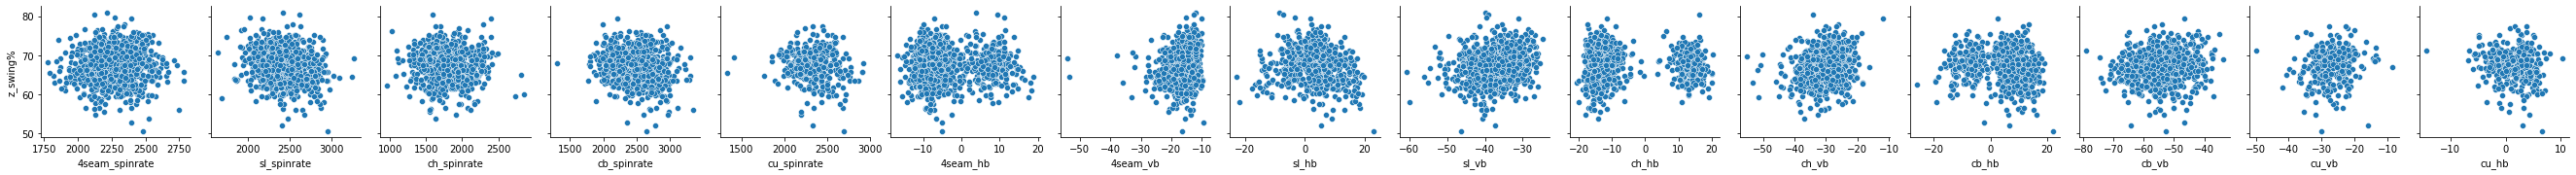

In [23]:
sns.pairplot(data = data, x_vars = spin, 
             y_vars = ['z_swing%']);

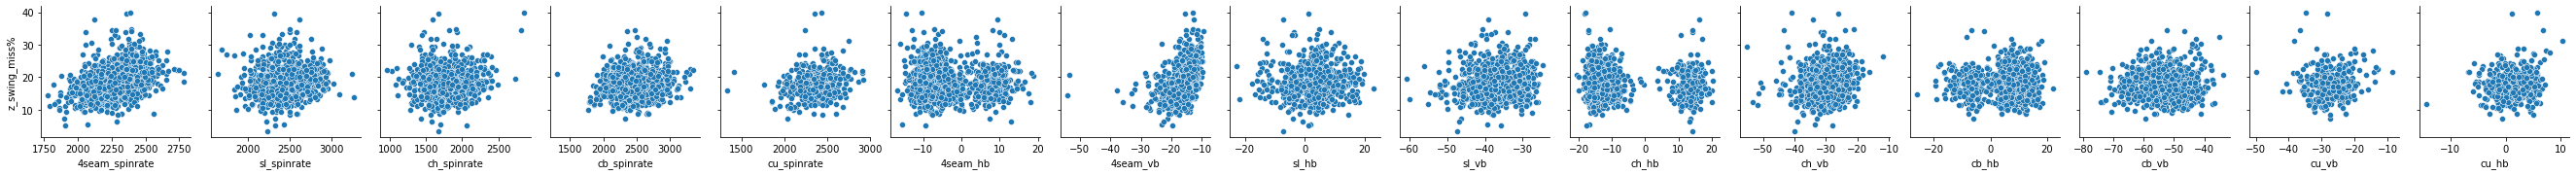

In [24]:
sns.pairplot(data = data, x_vars = spin, 
             y_vars = ['z_swing_miss%']);

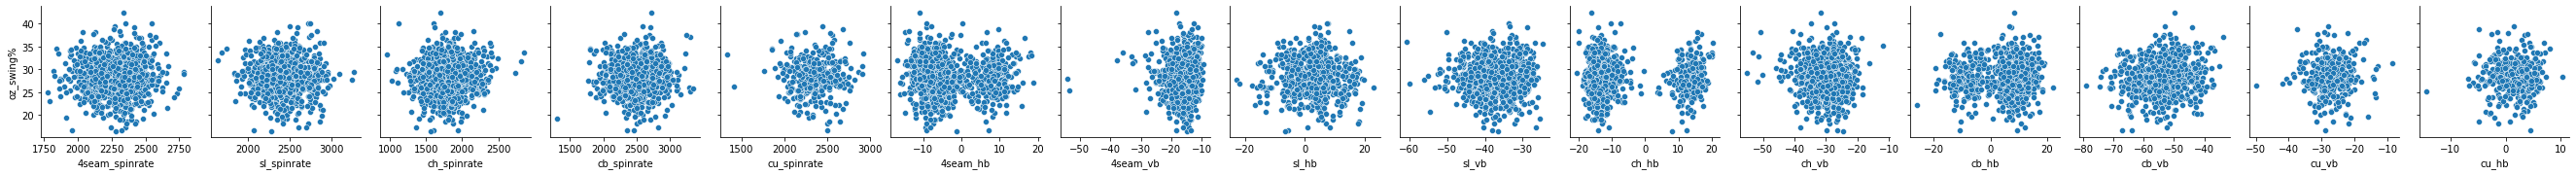

In [25]:
sns.pairplot(data = data, x_vars = spin, 
             y_vars = ['oz_swing%']);

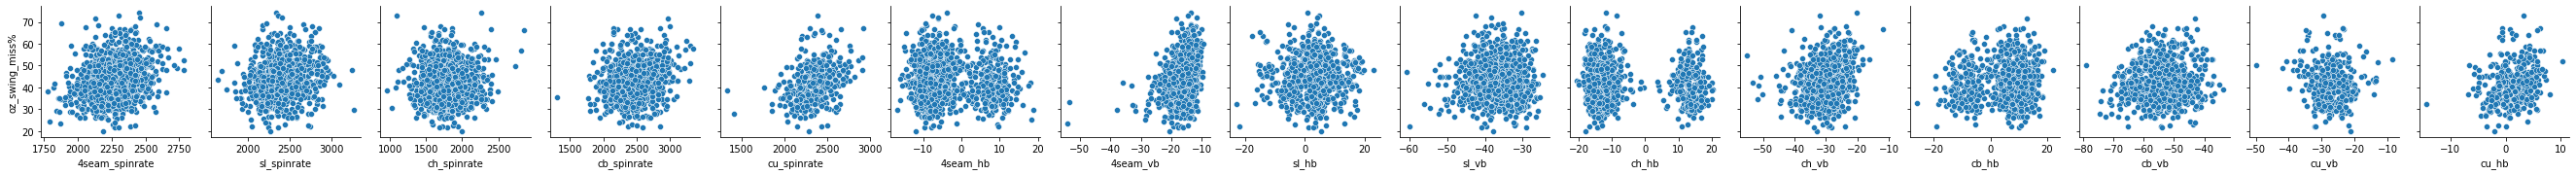

In [26]:
sns.pairplot(data = data, x_vars = spin, 
             y_vars = ['oz_swing_miss%']);

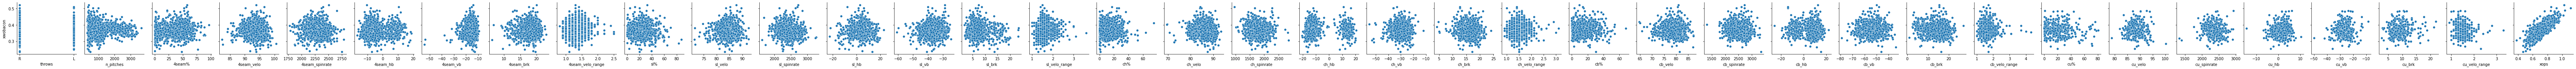

In [27]:
sns.pairplot(data = data, x_vars = pitch, 
             y_vars = ['xwobacon']);

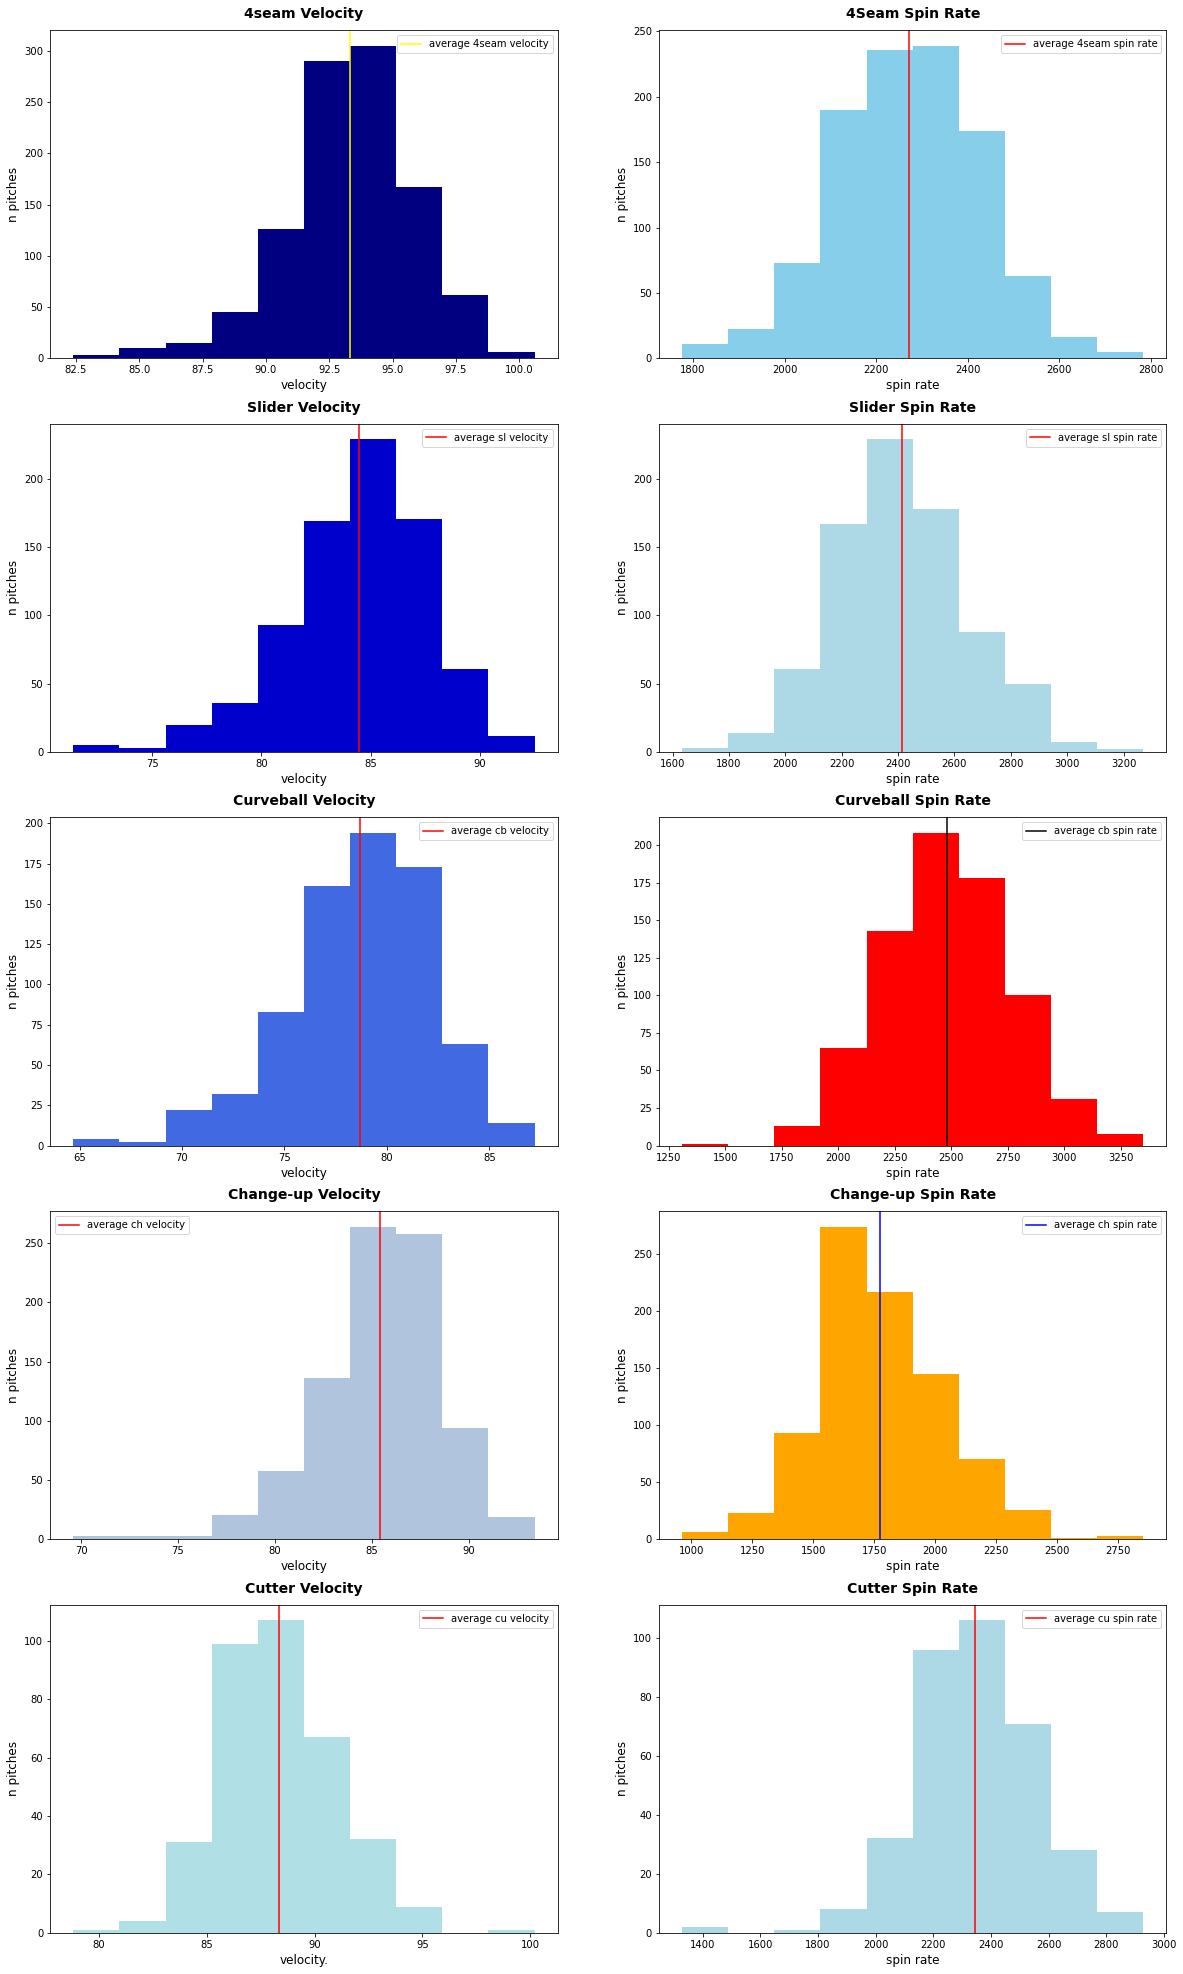

In [28]:
fig, ax = plt.subplots(5, 2, figsize = (20, 35))

ax[0][0].hist(data['4seam_velo'], color = 'navy')
ax[0][0].axvline(x = data['4seam_velo'].mean(), color = 'yellow', label = 'average 4seam velocity')
ax[0][0].set_xlabel('velocity', fontsize = 12)
ax[0][0].set_ylabel('n pitches', fontsize = 12)
ax[0][0].set_title('4seam Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][0].legend()

ax[0][1].hist(data['4seam_spinrate'], color = 'skyblue')
ax[0][1].axvline(x = data['4seam_spinrate'].mean(), color = 'r', label = 'average 4seam spin rate')
ax[0][1].set_xlabel('spin rate', fontsize = 12)
ax[0][1].set_ylabel('n pitches', fontsize = 12)
ax[0][1].set_title('4Seam Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][1].legend()

ax[1][0].hist(data['sl_velo'], color = 'mediumblue')
ax[1][0].axvline(x = data['sl_velo'].mean(), color = 'r', label = 'average sl velocity')
ax[1][0].set_xlabel('velocity', fontsize = 12)
ax[1][0].set_ylabel('n pitches', fontsize = 12)
ax[1][0].set_title('Slider Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][0].legend()

ax[1][1].hist(data['sl_spinrate'], color = 'lightblue')
ax[1][1].axvline(x = data['sl_spinrate'].mean(), color = 'r', label = 'average sl spin rate')
ax[1][1].set_xlabel('spin rate', fontsize = 12)
ax[1][1].set_ylabel('n pitches', fontsize = 12)
ax[1][1].set_title('Slider Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][1].legend()

ax[2][0].hist(data['cb_velo'], color = 'royalblue')
ax[2][0].axvline(x = data['cb_velo'].mean(), color = 'r', label = 'average cb velocity')
ax[2][0].set_xlabel('velocity', fontsize = 12)
ax[2][0].set_ylabel('n pitches', fontsize = 12)
ax[2][0].set_title('Curveball Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][0].legend()

ax[2][1].hist(data['cb_spinrate'], color = 'red')
ax[2][1].axvline(x = data['cb_spinrate'].mean(), color = 'k', label = 'average cb spin rate')
ax[2][1].set_xlabel('spin rate', fontsize = 12)
ax[2][1].set_ylabel('n pitches', fontsize = 12)
ax[2][1].set_title('Curveball Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][1].legend()

ax[3][0].hist(data['ch_velo'], color = 'lightsteelblue')
ax[3][0].axvline(x = data['ch_velo'].mean(), color = 'r', label = 'average ch velocity')
ax[3][0].set_xlabel('velocity', fontsize = 12)
ax[3][0].set_ylabel('n pitches', fontsize = 12)
ax[3][0].set_title('Change-up Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[3][0].legend()

ax[3][1].hist(data['ch_spinrate'], color = 'orange')
ax[3][1].axvline(x = data['ch_spinrate'].mean(), color = 'b', label = 'average ch spin rate')
ax[3][1].set_xlabel('spin rate', fontsize = 12)
ax[3][1].set_ylabel('n pitches', fontsize = 12)
ax[3][1].set_title('Change-up Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[3][1].legend()

ax[4][0].hist(data['cu_velo'], color = 'powderblue')
ax[4][0].axvline(x = data['cu_velo'].mean(), color = 'r', label = 'average cu velocity')
ax[4][0].set_xlabel('velocity.', fontsize = 12)
ax[4][0].set_ylabel('n pitches', fontsize = 12)
ax[4][0].set_title('Cutter Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[4][0].legend()

ax[4][1].hist(data['cu_spinrate'], color = 'lightblue')
ax[4][1].axvline(x = data['cu_spinrate'].mean(), color = 'r', label = 'average cu spin rate')
ax[4][1].set_xlabel('spin rate', fontsize = 12)
ax[4][1].set_ylabel('n pitches', fontsize = 12)
ax[4][1].set_title('Cutter Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[4][1].legend();

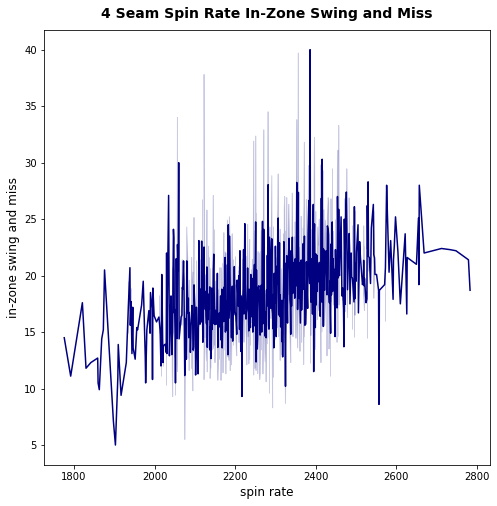

In [29]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['4seam_spinrate'],y = data['z_swing_miss%'], color = 'navy')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('4 Seam Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

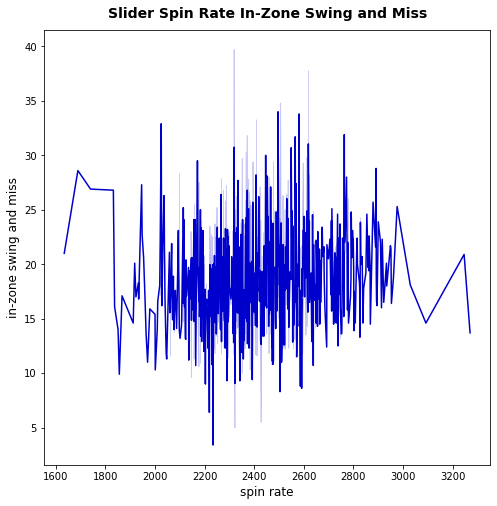

In [30]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['sl_spinrate'],y = data['z_swing_miss%'], color = 'mediumblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Slider Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

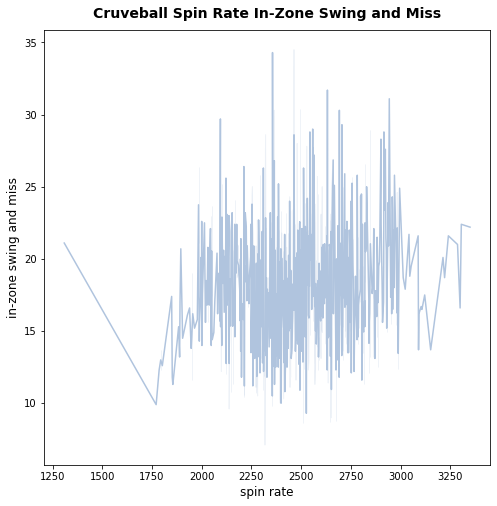

In [31]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['cb_spinrate'],y = data['z_swing_miss%'], color = 'lightsteelblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Cruveball Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

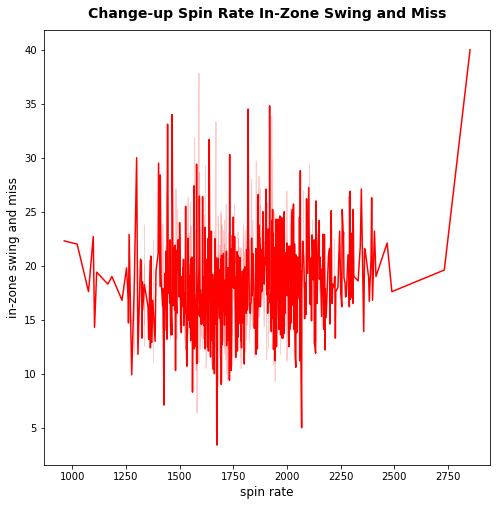

In [32]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['ch_spinrate'],y = data['z_swing_miss%'], color = 'red')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Change-up Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

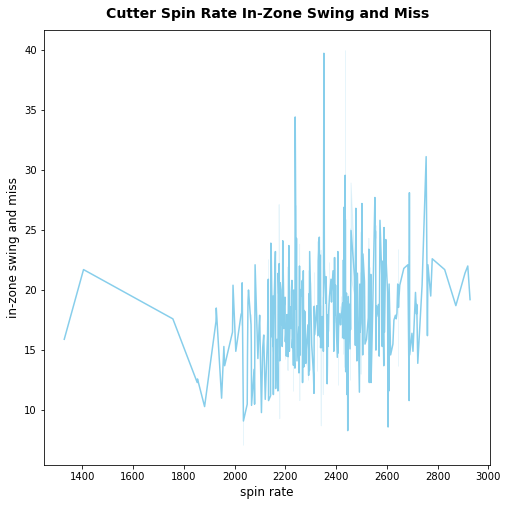

In [33]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['cu_spinrate'],y = data['z_swing_miss%'], color = 'skyblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Cutter Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

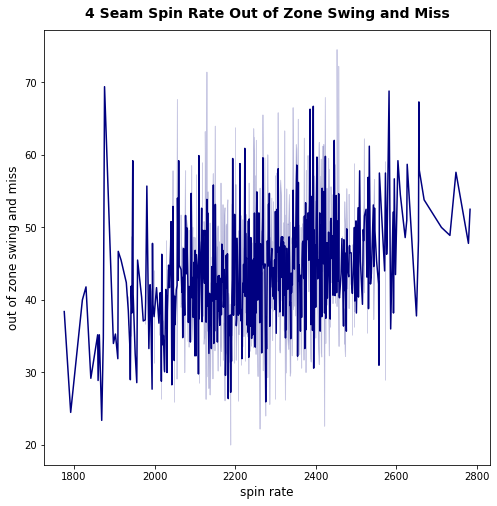

In [34]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['4seam_spinrate'],y = data['oz_swing_miss%'], color = 'navy')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('4 Seam Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

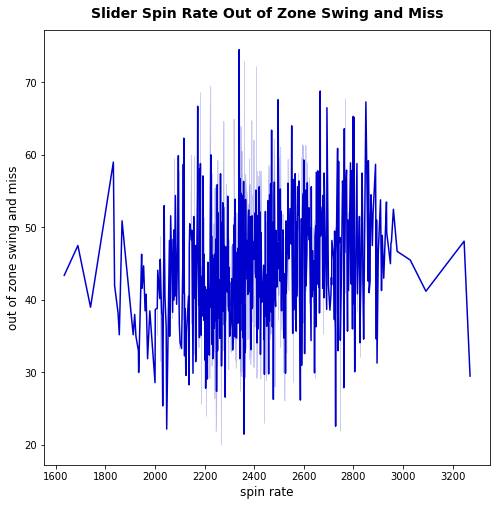

In [35]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['sl_spinrate'],y = data['oz_swing_miss%'], color = 'mediumblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Slider Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

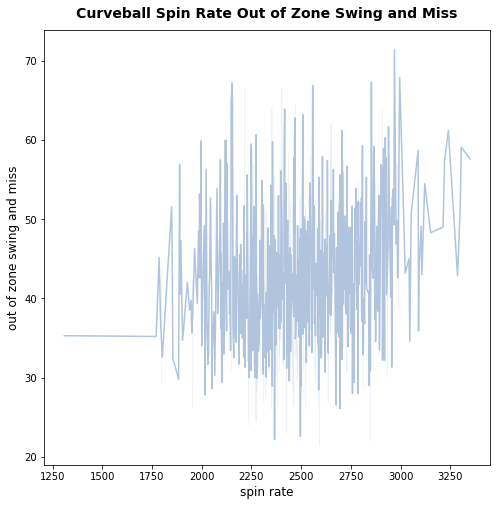

In [36]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['cb_spinrate'],y = data['oz_swing_miss%'], color = 'lightsteelblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Curveball Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

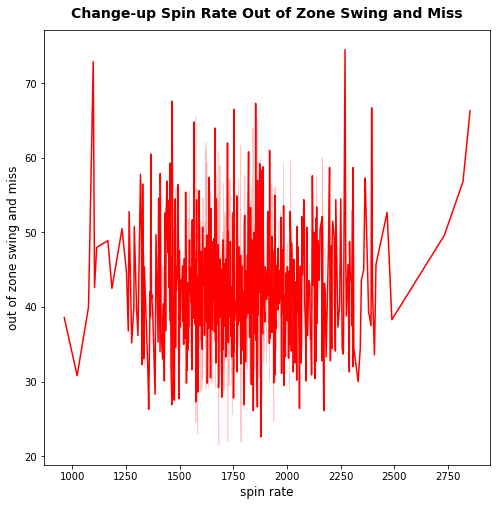

In [37]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['ch_spinrate'],y = data['oz_swing_miss%'], color = 'red')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Change-up Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

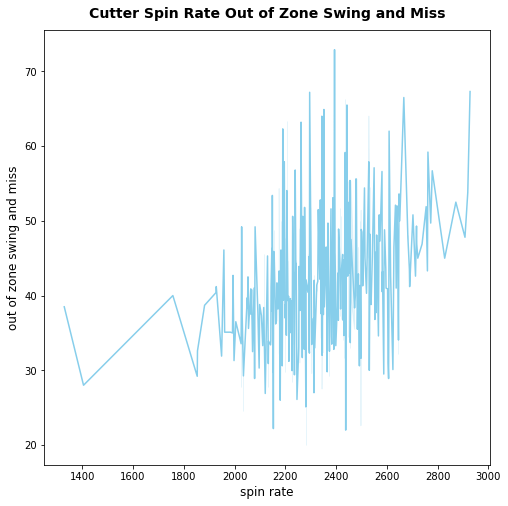

In [38]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = data['cu_spinrate'],y = data['oz_swing_miss%'], color = 'skyblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Cutter Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);